In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#lats = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#lngs = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#lat_lngs = zip(lats, lngs)

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

5.275030962480628 -142.62270057759767
22.48347964998952 -45.21616296114456
-16.616931905295417 78.70957784792574
0.4194669054032829 42.69216387343758
-69.62027557182172 -25.43216779182427
-72.90724856788702 -97.88878372103639
-66.92254047426403 130.04739173508335
-66.17650255450593 -160.0881879360907
-56.380789085314944 11.848767098652075
-76.4466123490773 15.825385912789187
-68.0094896386217 29.77822451218981
83.61339685788849 -26.64400081876255
44.478867735267784 135.64078533562315
72.86511422539553 -65.34916465411403
-43.43782053242014 -11.270340630481229
83.82433909531107 88.43981647936727
-65.38711743611941 -110.2537833838953
-41.54163405271821 75.95659744193128
17.566660611119417 159.7245868112064
-32.5832823541809 -66.14596717054353
-54.53289334345727 133.06581829655642
21.076383322767413 25.162752160942432
4.299811545648907 45.8292817365851
-76.72588639455134 -86.6495644102942
-46.96799987715445 85.6742123718002
-78.57909094903168 -109.23202517784314
33.71709286590449 -144.9779

-17.714204023625072 175.077377071844
-62.572646952047684 -118.66625125580767
-89.0815988799578 135.84186057135315
24.404777472038873 109.23004472854791
24.990923425299172 83.32482550940352
-50.639507912946755 -108.15265728282162
-63.51812201973257 -139.15107204056835
9.909469543461213 -58.7771200964651
34.696992176720684 109.96445264061754
-12.138050708954296 91.79134716974795
-40.67429368523347 -130.62836897742835
26.95212047592466 -50.83049960975961
70.82603447434883 177.47953507943765
-21.900410077609138 -86.69684436752875
34.280652332015876 -12.352136861720794
-32.59059139273212 178.00872679877358
-26.38927280783598 -24.96231315498261
-64.26732228847723 24.11967370451319
-29.86237556654843 12.52844757324317
-6.0333077499548295 51.922089739565536
31.931095483150017 3.3670233382168817
19.476994429680772 31.91010229588369
-55.056798424321606 -84.7492470812364
-1.8525578410654617 24.48325292465549
83.21188381879091 140.9191415702599
86.06037347140364 -179.18634494720172
44.058731819502

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atuona
Processing Record 2 of Set 1 | bathsheba
Processing Record 3 of Set 1 | hithadhoo
Processing Record 4 of Set 1 | jilib
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port elizabeth
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | dalnegorsk
Processing Record 14 of Set 1 | clyde river
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | san luis
Processing Record 20 of Set 1 | faya
Processing Record 21 of Set 1 | mahadday weyne
City not found. Skipping...

Processing Record 36 of Set 4 | tsumeb
Processing Record 37 of Set 4 | san quintin
Processing Record 38 of Set 4 | aklavik
Processing Record 39 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 40 of Set 4 | port blair
Processing Record 41 of Set 4 | fairlie
Processing Record 42 of Set 4 | toliary
City not found. Skipping...
Processing Record 43 of Set 4 | camacha
Processing Record 44 of Set 4 | road town
Processing Record 45 of Set 4 | satipo
Processing Record 46 of Set 4 | ostrovnoy
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | umm lajj
Processing Record 49 of Set 4 | boende
Processing Record 50 of Set 4 | east london
Processing Record 1 of Set 5 | duma
Processing Record 2 of Set 5 | bulgan
Processing Record 3 of Set 5 | znamenskoye
Processing Record 4 of Set 5 | arraial do cabo
Processing Record 5 of Set 5 | samarai
Processing Record 6 of Set 5 | dingle
Processing Record 7 of Set 5 | polson
Processing Record 8 o

Processing Record 25 of Set 8 | sahrak
City not found. Skipping...
Processing Record 26 of Set 8 | pitimbu
Processing Record 27 of Set 8 | pavlodar
Processing Record 28 of Set 8 | chatham
Processing Record 29 of Set 8 | saint-francois
Processing Record 30 of Set 8 | galveston
Processing Record 31 of Set 8 | onega
Processing Record 32 of Set 8 | san alberto
Processing Record 33 of Set 8 | taoudenni
Processing Record 34 of Set 8 | charters towers
Processing Record 35 of Set 8 | santa vitoria do palmar
Processing Record 36 of Set 8 | thanh hoa
Processing Record 37 of Set 8 | chiang rai
Processing Record 38 of Set 8 | port hedland
Processing Record 39 of Set 8 | nuuk
Processing Record 40 of Set 8 | erzin
Processing Record 41 of Set 8 | santa barbara
Processing Record 42 of Set 8 | labuhan
Processing Record 43 of Set 8 | catuday
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | muskogee
Processing Record 46 of Set 8 | dunedin
Processing Record 47 of Set 8 | wad madani
Pr

Processing Record 14 of Set 12 | sorland
Processing Record 15 of Set 12 | taltal
Processing Record 16 of Set 12 | uyemskiy
Processing Record 17 of Set 12 | olafsvik
Processing Record 18 of Set 12 | itarema
Processing Record 19 of Set 12 | coro
Processing Record 20 of Set 12 | darovskoy
Processing Record 21 of Set 12 | bejar
Processing Record 22 of Set 12 | epe
Processing Record 23 of Set 12 | liaoyang
Processing Record 24 of Set 12 | san jose de gracia
Processing Record 25 of Set 12 | la ronge
Processing Record 26 of Set 12 | normandin
Processing Record 27 of Set 12 | kargapolye
City not found. Skipping...
Processing Record 28 of Set 12 | kabin buri
Processing Record 29 of Set 12 | aquiraz
Processing Record 30 of Set 12 | wildeshausen
Processing Record 31 of Set 12 | atar
Processing Record 32 of Set 12 | neryungri
Processing Record 33 of Set 12 | garden city
Processing Record 34 of Set 12 | alugan
Processing Record 35 of Set 12 | bati
Processing Record 36 of Set 12 | altay
Processing R

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,76.87,74,5,17.94,PF,2022-10-02 00:54:28
1,Bathsheba,13.2167,-59.5167,83.01,78,40,13.80,BB,2022-10-02 00:54:28
2,Hithadhoo,-0.6000,73.0833,81.32,70,36,14.25,MV,2022-10-02 00:54:29
3,Jilib,0.4883,42.7854,70.54,93,44,4.25,SO,2022-10-02 00:54:30
4,Mar Del Plata,-38.0023,-57.5575,59.95,75,0,6.91,AR,2022-10-02 00:50:01
5,Punta Arenas,-53.1500,-70.9167,42.91,61,0,14.97,CL,2022-10-02 00:50:44
6,New Norfolk,-42.7826,147.0587,62.71,34,29,5.99,AU,2022-10-02 00:54:31
7,Mataura,-46.1927,168.8643,54.95,55,32,3.78,NZ,2022-10-02 00:54:31
8,Hermanus,-34.4187,19.2345,55.17,82,25,10.18,ZA,2022-10-02 00:54:32
9,Bredasdorp,-34.5322,20.0403,50.88,90,39,3.74,ZA,2022-10-02 00:54:32


In [11]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [12]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2022-10-02 00:54:28,-9.8000,-139.0333,76.87,74,5,17.94
1,Bathsheba,BB,2022-10-02 00:54:28,13.2167,-59.5167,83.01,78,40,13.80
2,Hithadhoo,MV,2022-10-02 00:54:29,-0.6000,73.0833,81.32,70,36,14.25
3,Jilib,SO,2022-10-02 00:54:30,0.4883,42.7854,70.54,93,44,4.25
4,Mar Del Plata,AR,2022-10-02 00:50:01,-38.0023,-57.5575,59.95,75,0,6.91
...,...,...,...,...,...,...,...,...,...
555,Lompoc,US,2022-10-02 01:11:15,34.6391,-120.4579,71.74,72,0,6.91
556,Buchanan,LR,2022-10-02 01:11:15,5.8808,-10.0467,75.61,90,100,6.33
557,Mercedes,AR,2022-10-02 01:11:16,-34.6515,-59.4307,61.79,53,87,6.51
558,Chumikan,RU,2022-10-02 01:11:17,54.7183,135.3150,38.68,70,100,5.46


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

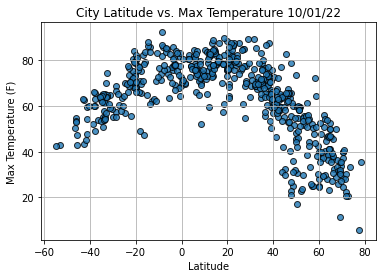

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

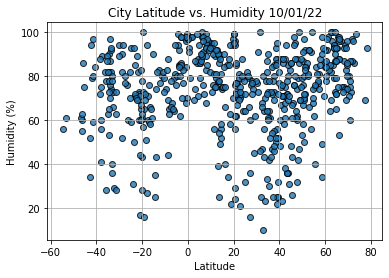

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

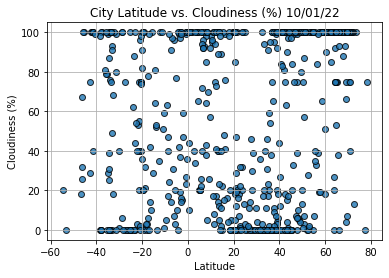

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

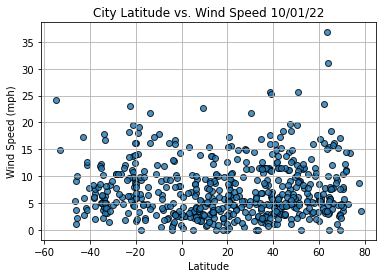

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

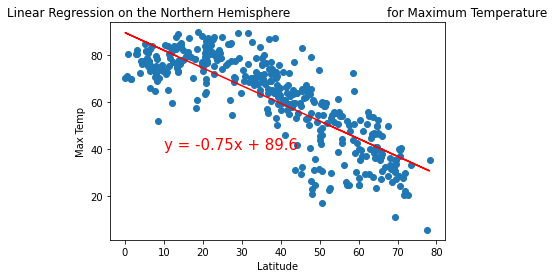

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

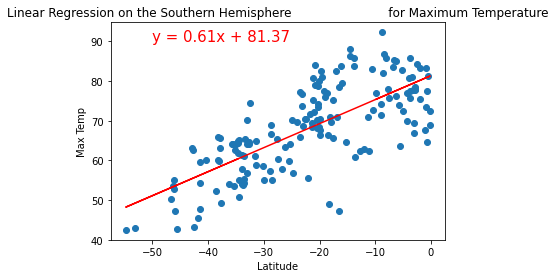

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

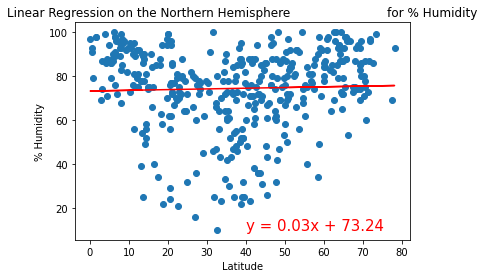

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

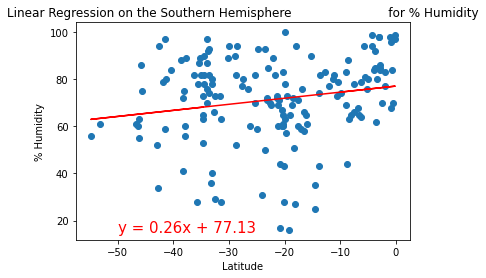

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

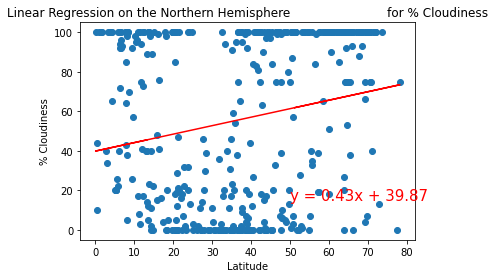

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(50,15))

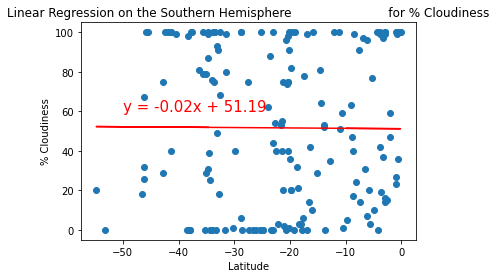

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

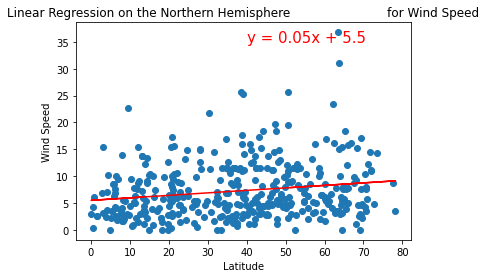

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))